In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
data = pd.read_csv('C:/Users/Dosajh/Documents/Python Scripts/Minimizing churn rate/new_churn_data.csv')
import random
user = data['user']
data = data.drop(columns='user')
data = pd.get_dummies(data)
data = data.drop(columns = ['housing_na', 'zodiac_sign_na', 'payment_type_na'])
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(columns = 'churn'), data['churn'],test_size = 0.2,random_state = 0)
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index
if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index
random.seed(0)
higher = np.random.choice(higher, size=len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))
X_train = X_train.loc[new_indexes,]
y_train = y_train[new_indexes]
x_train=preprocessing.normalize(X_train)
x_test = preprocessing.normalize(X_test)

In [2]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(x_train, y_train) 
  
# making predictions on the testing set 
y_pred = gnb.predict(x_test) 
  
# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)


Gaussian Naive Bayes model accuracy(in %): 62.32533614553124


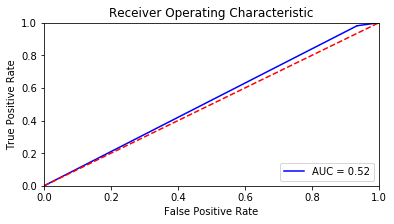

In [14]:
probs = gnb.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.figure(figsize=(6,3))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
